<a href="https://colab.research.google.com/github/ahora3734/2022.7._python_word-cloud/blob/main/%EC%98%81%EC%96%B4%2C_%ED%95%9C%EA%B8%80_%ED%98%BC%EC%9A%A9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 한글😚영어😚 혼용 워드클라우드




한글 및 영어에 대한 각각의 형태소 분석기 기능이 다르기에, 안타깝게도 아직까진

국영문 혼합된 데이터에 대해 한번에 전처리를 할 수 있는 모듈은 없다.

방법

1. 한글인지 영문인지 먼저 파악하고 데이터를 분류한 다음
2. 각 언어에 대해 다른 형태소 분석기 및 불용어 처리, 토크나이저를 적용한 후,
3. 그 다음에서야 토큰들을 섞어, 워드 클라우드를 만듦.

# 1. 라이브러리(모듈) **설치**🔧

1-1. 라이브러리 설치

In [ ]:
# 이 쉘은 현재 실행중인 코랩 런타임에 라이브러리를 설치하기 위한 쉘입니다.
# 코랩 클라우드 연결 후 한 번만 실행하면, 런타임이 해제될 때까지 설치 상태가 유지됩니다. 
!pip install nltk
!pip install wordcloud
!pip install konlpy
!pip install numpy as np
!pip install ipython
!pip install ipykernel
!pip install requests bs4 
!pip install Twitter


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 25.5 MB/s 
     |████████████████████████████████| 453 kB 44.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-p

1-2. 라이브러리 불러오기

In [ ]:
# ipynb파일을 실행한 브라우저에서 바로 이미지를 볼 수 있게 해주는 명령어
%matplotlib inline 

# 라이브러리 불러오기
import nltk
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
import matplotlib.image as img
import matplotlib   
from IPython.display import set_matplotlib_formats 
from konlpy.tag import Twitter 
from PIL import Image
from wordcloud import STOPWORDS
import numpy as np 
import requests 
import pickle
from nltk.corpus import stopwords
import re

# numpy 라이브러리는 마스크를 적용할 때 사용하는 라이브러리입니다. 마스크가 필요없으면 설치하지 않아도 됩니다.
set_matplotlib_formats('retina')  #조금 더 선명하게 글자를 출력하기 위한 명령어

matplotlib.rc('axes',unicode_minus = False)  #그래프에서 마이너스를 표시하기 위한 명령어

nltk.download('punkt') #영어 토큰화에 필요한 것
nltk.download('averaged_perceptron_tagger')  #영어 태깅에 필요한 것
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# 2. 한글 **토큰화**💰

2-1. 파일 불러오기

In [ ]:
# 한글 txt파일 불러오기
file = open("/content/3.txt", 'r', encoding='utf-8') 
lists = file.readlines()  # txt파일을 한줄씩 읽어서 lists 변수에 저장하겠다
file.close() 

print(lists)

['인공지능, 햄스터, 엔트리, 퀵드로우, 마이크로비트 등\n', '인공지능, 메타버스 등\n', '인공지능 이해, 인공지능 활용 교육\n', '인공지능 이해, 인공지능 대비, 인공지능 활용 교육\n', 'AI교육이해, 윤리, 빅데이터, 피지컬컴퓨터, NFT\n', 'AI교육의 기초, 데이터 크롤링, AI윤리, 피지컬컴퓨터, 오렌지\n', '인공지능 융합교육 기본 이해\n', '교육과정 연계 인공지능 교육\n', '코딩, 애플리케이션\n', '코딩, 애플리케이션\n', '코딩, 프로그램\n', '인공지능 활용 수업사례 연수\n', 'AI, 빅데이터, IoT 활용, AI 리터러시 역량 등\n', '빅데이터, 머신러닝, 컴퓨터비전 인식, 인공지능 윤리 등\n', '허스키렌즈, 오렌지3, 티쳐블머신 등\n', '아두이노, 챗봇, 라즈베리파이 등\n', 'AI, EPL, 피지컬 컴퓨팅\n', '파이썬, 빅데이터 분석\n', '데이터 과학, 머신러닝\n', 'AI활용 소셜임팩트, 머신러닝\n', '데이터과학, 머신러닝, 엔트리\n', '교과융업사례, 데이터, 메타버스\n', '파이썬, 디지털 리터러시\n', 'LoT, 머신러닝, 인공지닝과 윤리\n', '머신러닝, 엔트리 외\n', '교실수업 사례, 티처블머신&머신러닝포키즈 체험, AI엔트리 실습 외\n', '코딩, 파이썬\n', 'AI 윤리, 챗봇, 오렌지3, 기초 코딩\n', 'AI활용 수업 사례\n', 'AI활용 수업 사례\n', '마이크로비트 활용, AI 활용 문화예술교육\n', '인공지능과 교육생태계, 인공지능 앱, 융합 프로젝트\n', '"데이터 과학의 이해와 \n', '교육 데이터 분석\n', '교과에 적용하는 인공지능"\n', '"인공지능의 이해\n', '인공지능 대비\n', ' 인공지능 활용"\n', '머신러닝, 프로그래밍\n', '인공지능의 이해, 대비, 활용\n', 'AI 교육 사례, 메타버스 등\n', 'AI 교육 사례, 코딩 등\n', 'AI 기반 융합교육 이해와 실체\n', 'AI와 알고리즘 따

2-2. 품사 분류하기

In [ ]:
twitter = Twitter()  # Twitter 함수를 호출하여 twitter변수에 저장하겠다.
morphs = [] # morphs라는 빈 리스트 변수를 만든다.

# txt파일을 읽어서 lists변수에 저장한 것을 for반복문을 통해 형태소값으로 분할해서 morphs변수에 리스트형태로 추가한다.
for sentence in lists: 
    morphs.append(twitter.pos(sentence)) 
print(morphs)

/usr/local/lib/python3.7/dist-packages/konlpy/tag/_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[[('인공', 'Noun'), ('지능', 'Noun'), (',', 'Punctuation'), ('햄스터', 'Noun'), (',', 'Punctuation'), ('엔트리', 'Noun'), (',', 'Punctuation'), ('퀵드', 'Noun'), ('로우', 'Noun'), (',', 'Punctuation'), ('마이크로', 'Noun'), ('비트', 'Noun'), ('등', 'Noun'), ('\n', 'Foreign')], [('인공', 'Noun'), ('지능', 'Noun'), (',', 'Punctuation'), ('메타', 'Noun'), ('버스', 'Noun'), ('등', 'Noun'), ('\n', 'Foreign')], [('인공', 'Noun'), ('지능', 'Noun'), ('이해', 'Noun'), (',', 'Punctuation'), ('인공', 'Noun'), ('지능', 'Noun'), ('활용', 'Noun'), ('교육', 'Noun'), ('\n', 'Foreign')], [('인공', 'Noun'), ('지능', 'Noun'), ('이해', 'Noun'), (',', 'Punctuation'), ('인공', 'Noun'), ('지능', 'Noun'), ('대비', 'Noun'), (',', 'Punctuation'), ('인공', 'Noun'), ('지능', 'Noun'), ('활용', 'Noun'), ('교육', 'Noun'), ('\n', 'Foreign')], [('AI', 'Alpha'), ('교육', 'Noun'), ('이해', 'Noun'), (',', 'Punctuation'), ('윤리', 'Noun'), (',', 'Punctuation'), ('빅데이터', 'Noun'), (',', 'Punctuation'), ('피지', 'Noun'), ('컬', 'Noun'), ('컴퓨터', 'Noun'), (',', 'Punctuation'), ('NFT', 'Alpha'), ('\

# 3. 한글 단어 **정제 작업**🔎

3-1. 이상한 단어 강제 삭제

In [ ]:
 # kor_text_list라는 빈 리스트 변수를 만든다.
kor_text_list=[] 

# 명사만 골라내기
for sentence in morphs : 
    for word, tag in sentence : 
        # 의미없는 부사를 골라내어 tag라는 변수에 저장한다(버린다)
        if tag in ['Noun'] and ("것" not in word) and ("내" not in word) and ("나" not in word) and ("수" not in word) and ("게" not in word) and ("말" not in word) and ("," not in word) and ("네" not in word) and ("쫌" not in word) and ("또" not in word) and ("음.." not in word) and ("이" not in word) and ("의" not in word) and ("기반" not in word) and ("교육" not in word) and ("직무" not in word)  : 
            kor_text_list.append(word) # 부사를 제외한 단어들을 리스트형태로 kor_text_list에서 저장한다.
print(kor_text_list)

['인공', '지능', '햄스터', '엔트리', '퀵드', '로우', '비트', '등', '인공', '지능', '메타', '버스', '등', '인공', '지능', '인공', '지능', '활용', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '윤리', '피지', '컬', '컴퓨터', '기초', '크롤', '링', '윤리', '피지', '컬', '컴퓨터', '오렌지', '인공', '지능', '융합', '기본', '계', '인공', '지능', '코딩', '코딩', '코딩', '프로그램', '인공', '지능', '활용', '사례', '활용', '리터', '러시', '역량', '등', '머신', '러닝', '컴퓨터', '인식', '인공', '지능', '윤리', '등', '스키', '렌즈', '오렌지', '티', '쳐블', '머신', '등', '챗봇', '등', '피지', '컬', '컴퓨팅', '분석', '과학', '머신', '러닝', '활용', '소셜', '임팩트', '머신', '러닝', '과학', '머신', '러닝', '엔트리', '교과', '융업', '사례', '메타', '버스', '디지털', '리터', '러시', '머신', '러닝', '인공', '지닝', '윤리', '머신', '러닝', '엔트리', '외', '교실', '사례', '티처블', '머신', '머신', '러닝', '포', '키즈', '체험', '엔트리', '실습', '외', '코딩', '윤리', '챗봇', '오렌지', '기초', '코딩', '활용', '사례', '활용', '사례', '비트', '활용', '활용', '문화', '예술', '인공', '지능', '생태계', '인공', '지능', '앱', '융합', '프로젝트', '과학', '분석', '교과', '적용', '인공', '지능', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '머신', '러닝', '프로그래밍', '인공', '지능', '대비', '활용', '사례', '메

3-2. 한글 단어 강제 추가

In [ ]:
# 강제로 텍스트 넣기 위해 3행에 넣고 싶은 단어를 넣어주시면 됩니다. 강제추가 하지 않으려면 그냥 넘어가세요.
for sentence in range(30) :
   kor_text_list.append("화이팅!!")
print(kor_text_list)

['인공', '지능', '햄스터', '엔트리', '퀵드', '로우', '비트', '등', '인공', '지능', '메타', '버스', '등', '인공', '지능', '인공', '지능', '활용', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '윤리', '피지', '컬', '컴퓨터', '기초', '크롤', '링', '윤리', '피지', '컬', '컴퓨터', '오렌지', '인공', '지능', '융합', '기본', '계', '인공', '지능', '코딩', '코딩', '코딩', '프로그램', '인공', '지능', '활용', '사례', '활용', '리터', '러시', '역량', '등', '머신', '러닝', '컴퓨터', '인식', '인공', '지능', '윤리', '등', '스키', '렌즈', '오렌지', '티', '쳐블', '머신', '등', '챗봇', '등', '피지', '컬', '컴퓨팅', '분석', '과학', '머신', '러닝', '활용', '소셜', '임팩트', '머신', '러닝', '과학', '머신', '러닝', '엔트리', '교과', '융업', '사례', '메타', '버스', '디지털', '리터', '러시', '머신', '러닝', '인공', '지닝', '윤리', '머신', '러닝', '엔트리', '외', '교실', '사례', '티처블', '머신', '머신', '러닝', '포', '키즈', '체험', '엔트리', '실습', '외', '코딩', '윤리', '챗봇', '오렌지', '기초', '코딩', '활용', '사례', '활용', '사례', '비트', '활용', '활용', '문화', '예술', '인공', '지능', '생태계', '인공', '지능', '앱', '융합', '프로젝트', '과학', '분석', '교과', '적용', '인공', '지능', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '머신', '러닝', '프로그래밍', '인공', '지능', '대비', '활용', '사례', '메

In [ ]:
# 영어가 필요없을 경우 여기까지만 하고 7번으로 넘어가세요.
tokenize_eng = []

# 4. 영어 **토큰화**🎰

4-1. 파일 불러오기

In [ ]:
# 영어 토큰화, 영어 txt파일을 읽어드리고 싶으면 파일업로드 후 파일명 2행에 수정
eng_text= open('3.txt', encoding='UTF8').read()

# 대문자를 소문자로 바꾸기
# eng_text_2 = eng_text.lower() 

#각각의 워드를 토큰으로 쪼갠다.
word_tokens = nltk.word_tokenize(eng_text) 
print(word_tokens)

['인공지능', ',', '햄스터', ',', '엔트리', ',', '퀵드로우', ',', '마이크로비트', '등', '인공지능', ',', '메타버스', '등', '인공지능', '이해', ',', '인공지능', '활용', '교육', '인공지능', '이해', ',', '인공지능', '대비', ',', '인공지능', '활용', '교육', 'AI교육이해', ',', '윤리', ',', '빅데이터', ',', '피지컬컴퓨터', ',', 'NFT', 'AI교육의', '기초', ',', '데이터', '크롤링', ',', 'AI윤리', ',', '피지컬컴퓨터', ',', '오렌지', '인공지능', '융합교육', '기본', '이해', '교육과정', '연계', '인공지능', '교육', '코딩', ',', '애플리케이션', '코딩', ',', '애플리케이션', '코딩', ',', '프로그램', '인공지능', '활용', '수업사례', '연수', 'AI', ',', '빅데이터', ',', 'IoT', '활용', ',', 'AI', '리터러시', '역량', '등', '빅데이터', ',', '머신러닝', ',', '컴퓨터비전', '인식', ',', '인공지능', '윤리', '등', '허스키렌즈', ',', '오렌지3', ',', '티쳐블머신', '등', '아두이노', ',', '챗봇', ',', '라즈베리파이', '등', 'AI', ',', 'EPL', ',', '피지컬', '컴퓨팅', '파이썬', ',', '빅데이터', '분석', '데이터', '과학', ',', '머신러닝', 'AI활용', '소셜임팩트', ',', '머신러닝', '데이터과학', ',', '머신러닝', ',', '엔트리', '교과융업사례', ',', '데이터', ',', '메타버스', '파이썬', ',', '디지털', '리터러시', 'LoT', ',', '머신러닝', ',', '인공지닝과', '윤리', '머신러닝', ',', '엔트리', '외', '교실수업', '사례', ',', '티처블머신', '&', '머신러닝포

4-2. 품사 분류하기

In [ ]:
# 품사를 분리한다. 영어의 경우는 nltk에서 제공하는 pos_tag() 함수를 사용해서 품사 태깅을 할 수 있다.
# 품사정보는 https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html 에서 확인할 수 있다.

tokens_pos = nltk.pos_tag(word_tokens)
print(tokens_pos)

[('인공지능', 'NN'), (',', ','), ('햄스터', 'NNP'), (',', ','), ('엔트리', 'NNP'), (',', ','), ('퀵드로우', 'NNP'), (',', ','), ('마이크로비트', 'NNP'), ('등', 'NNP'), ('인공지능', 'NNP'), (',', ','), ('메타버스', 'NNP'), ('등', 'NNP'), ('인공지능', 'NNP'), ('이해', 'NNP'), (',', ','), ('인공지능', 'NNP'), ('활용', 'NNP'), ('교육', 'NNP'), ('인공지능', 'NNP'), ('이해', 'NNP'), (',', ','), ('인공지능', 'NNP'), ('대비', 'NNP'), (',', ','), ('인공지능', 'NNP'), ('활용', 'NNP'), ('교육', 'NNP'), ('AI교육이해', 'NNP'), (',', ','), ('윤리', 'NNP'), (',', ','), ('빅데이터', 'NNP'), (',', ','), ('피지컬컴퓨터', 'NNP'), (',', ','), ('NFT', 'NNP'), ('AI교육의', 'NNP'), ('기초', 'NNP'), (',', ','), ('데이터', 'NNP'), ('크롤링', 'NNP'), (',', ','), ('AI윤리', 'NNP'), (',', ','), ('피지컬컴퓨터', 'NNP'), (',', ','), ('오렌지', 'NNP'), ('인공지능', 'NNP'), ('융합교육', 'NNP'), ('기본', 'NNP'), ('이해', 'NNP'), ('교육과정', 'NNP'), ('연계', 'NNP'), ('인공지능', 'NNP'), ('교육', 'NNP'), ('코딩', 'NNP'), (',', ','), ('애플리케이션', 'NNP'), ('코딩', 'NNP'), (',', ','), ('애플리케이션', 'NNP'), ('코딩', 'NNP'), (',', ','), ('프로그램', 'NNP'), ('인공

# 5. 영어 단어 **정제 작업**🔎

5-1. 명사만 골라낸 후 사전 작업하기

In [ ]:
tokenize_eng = []
for word, pos in tokens_pos:
    if 'NN' in pos: #명사만 추출하는 것
        tokenize_eng.append(word)

print(tokenize_eng)

['인공지능', '햄스터', '엔트리', '퀵드로우', '마이크로비트', '등', '인공지능', '메타버스', '등', '인공지능', '이해', '인공지능', '활용', '교육', '인공지능', '이해', '인공지능', '대비', '인공지능', '활용', '교육', 'AI교육이해', '윤리', '빅데이터', '피지컬컴퓨터', 'NFT', 'AI교육의', '기초', '데이터', '크롤링', 'AI윤리', '피지컬컴퓨터', '오렌지', '인공지능', '융합교육', '기본', '이해', '교육과정', '연계', '인공지능', '교육', '코딩', '애플리케이션', '코딩', '애플리케이션', '코딩', '프로그램', '인공지능', '활용', '수업사례', '연수', 'AI', '빅데이터', 'IoT', '활용', 'AI', '리터러시', '역량', '등', '빅데이터', '머신러닝', '컴퓨터비전', '인식', '인공지능', '윤리', '등', '허스키렌즈', '오렌지3', '티쳐블머신', '등', '아두이노', '챗봇', '라즈베리파이', '등', 'AI', 'EPL', '피지컬', '컴퓨팅', '파이썬', '빅데이터', '분석', '데이터', '과학', '머신러닝', 'AI활용', '소셜임팩트', '머신러닝', '데이터과학', '머신러닝', '엔트리', '교과융업사례', '데이터', '메타버스', '파이썬', '디지털', '리터러시', 'LoT', '머신러닝', '인공지닝과', '윤리', '머신러닝', '엔트리', '외', '교실수업', '사례', '티처블머신', '머신러닝포키즈', '체험', 'AI엔트리', '실습', '외', '코딩', '파이썬', 'AI', '윤리', '챗봇', '오렌지3', '기초', '코딩', 'AI활용', '수업', '사례', 'AI활용', '수업', '사례', '마이크로비트', '활용', 'AI', '활용', '문화예술교육', '인공지능과', '교육생태계', '인공지능', '앱', '융합', '프로젝트', '데이터', '과학의', '

In [ ]:
# 변수명 바꿔주기
final_NN_words = tokenize_eng
print(final_NN_words)

['인공지능', '햄스터', '엔트리', '퀵드로우', '마이크로비트', '등', '인공지능', '메타버스', '등', '인공지능', '이해', '인공지능', '활용', '교육', '인공지능', '이해', '인공지능', '대비', '인공지능', '활용', '교육', 'AI교육이해', '윤리', '빅데이터', '피지컬컴퓨터', 'NFT', 'AI교육의', '기초', '데이터', '크롤링', 'AI윤리', '피지컬컴퓨터', '오렌지', '인공지능', '융합교육', '기본', '이해', '교육과정', '연계', '인공지능', '교육', '코딩', '애플리케이션', '코딩', '애플리케이션', '코딩', '프로그램', '인공지능', '활용', '수업사례', '연수', 'AI', '빅데이터', 'IoT', '활용', 'AI', '리터러시', '역량', '등', '빅데이터', '머신러닝', '컴퓨터비전', '인식', '인공지능', '윤리', '등', '허스키렌즈', '오렌지3', '티쳐블머신', '등', '아두이노', '챗봇', '라즈베리파이', '등', 'AI', 'EPL', '피지컬', '컴퓨팅', '파이썬', '빅데이터', '분석', '데이터', '과학', '머신러닝', 'AI활용', '소셜임팩트', '머신러닝', '데이터과학', '머신러닝', '엔트리', '교과융업사례', '데이터', '메타버스', '파이썬', '디지털', '리터러시', 'LoT', '머신러닝', '인공지닝과', '윤리', '머신러닝', '엔트리', '외', '교실수업', '사례', '티처블머신', '머신러닝포키즈', '체험', 'AI엔트리', '실습', '외', '코딩', '파이썬', 'AI', '윤리', '챗봇', '오렌지3', '기초', '코딩', 'AI활용', '수업', '사례', 'AI활용', '수업', '사례', '마이크로비트', '활용', 'AI', '활용', '문화예술교육', '인공지능과', '교육생태계', '인공지능', '앱', '융합', '프로젝트', '데이터', '과학의', '

5-2. 불용어 제거하기

In [ ]:
# 불용어사전 리스트 가져오기
stopwords_list = stopwords.words() #nltk에서 제공하는 불용어사전 이용
print('stopwords: ', stopwords_list)

# tokenize_eng를 unique_NN_words로 세팅하기
unique_NN_words = set(tokenize_eng)
print(unique_NN_words)

# 불용어 제거
for word in unique_NN_words:
    if word in stopwords_list:
        while word in final_NN_words: final_NN_words.remove(word)

print(tokenize_eng)        

stopwords:  ['إذ', 'إذا', 'إذما', 'إذن', 'أف', 'أقل', 'أكثر', 'ألا', 'إلا', 'التي', 'الذي', 'الذين', 'اللاتي', 'اللائي', 'اللتان', 'اللتيا', 'اللتين', 'اللذان', 'اللذين', 'اللواتي', 'إلى', 'إليك', 'إليكم', 'إليكما', 'إليكن', 'أم', 'أما', 'أما', 'إما', 'أن', 'إن', 'إنا', 'أنا', 'أنت', 'أنتم', 'أنتما', 'أنتن', 'إنما', 'إنه', 'أنى', 'أنى', 'آه', 'آها', 'أو', 'أولاء', 'أولئك', 'أوه', 'آي', 'أي', 'أيها', 'إي', 'أين', 'أين', 'أينما', 'إيه', 'بخ', 'بس', 'بعد', 'بعض', 'بك', 'بكم', 'بكم', 'بكما', 'بكن', 'بل', 'بلى', 'بما', 'بماذا', 'بمن', 'بنا', 'به', 'بها', 'بهم', 'بهما', 'بهن', 'بي', 'بين', 'بيد', 'تلك', 'تلكم', 'تلكما', 'ته', 'تي', 'تين', 'تينك', 'ثم', 'ثمة', 'حاشا', 'حبذا', 'حتى', 'حيث', 'حيثما', 'حين', 'خلا', 'دون', 'ذا', 'ذات', 'ذاك', 'ذان', 'ذانك', 'ذلك', 'ذلكم', 'ذلكما', 'ذلكن', 'ذه', 'ذو', 'ذوا', 'ذواتا', 'ذواتي', 'ذي', 'ذين', 'ذينك', 'ريث', 'سوف', 'سوى', 'شتان', 'عدا', 'عسى', 'عل', 'على', 'عليك', 'عليه', 'عما', 'عن', 'عند', 'غير', 'فإذا', 'فإن', 'فلا', 'فمن', 'في', 'فيم', 'فيما', 'فيه

In [ ]:
# 직접 만든 불용어 리스트, 제거하고 싶은 걸 추가해서 사용
customized_stopwords = ['act','No','label','song','Korean', 'recording']

# 빼고 싶은 단어 제거
unique_NN_words1 = set(final_NN_words)
print(unique_NN_words1)

for word in unique_NN_words1:
    if word in customized_stopwords:
        while word in final_NN_words: final_NN_words.remove(word)

print(tokenize_eng)

{'코딩드론', '할로코드', '프린터사용법', '전환', '프로그래밍', '라즈베리파이', 'Tool', 'VR', '가제', '피지컬컴퓨터', '설계', '영어교사의', '엔트리', '프로그램', '슬기로운', '디벗', '블록코딩', 'ON', '만남', 'AI기반', '폭력', '다루기', '이프렌드수업활용방안', '문서도구', '이용한', '워드클라우드', '분석', '프라임로봇', '설계와', '에듀테크를', '미래교육', 'ㅇㅇ중', '생태전환교육', '원격초등', '언클러그드', '기초과정', 'AI교육이해', 'sw교육', '대비', '엠블록', '중등', '살아남기', '첫걸음떼기', '마인크래프트', 'SW･AI', '만나는', 'SNS', '연계', 'ICT융합기기', '공공데이터', '실시간', '온라인', '협력수업', '도구', '소셜임팩트', '데이터분석까지', '라이브러리', '앱', '연수', '에듀테크', '소셜매트릭스', '되기', '학교에서의', '강화', 'AI교육', '프로그래밍과', '융합수업', '피지컬', '인공지능과', '및', '대비하기', '창의융합', '코랩', '놀이', '드론', '네이버', '교육', 'p5.js', '쌤', '사이', '초등우리학교', '실습', '교사를', '인공지능기초원리', '데이터리터러시', '교과연계', '융합교육을', '아두이노를', '인공지닝과', '제작하기', '이해', 'AI교육의', 'AI윤리', '티쳐블머신', '만들기', '미디어활용', 'ZEP', '초등', 'AI활용의', '코스페이시스', 'AI리터러시', '제페토', 'AI현미경', '활용해요', '역량강화', '가설', '퀵드로우', '데이터분석', '코딩없이', '강화를', '방법', '직무연수-인공지능시대', '마이크로비트', '속', '프린팅을', '미래를', '교과에', '미래수업의', '교실수업', '이프랜드', ']', '원격', '[', '블렌디드수업을', '코딩교육', '마이크로비트활용', 

5-3. 영어 단어 강제 추가

In [ ]:
#강제로 텍스트 넣기 위해 9행에 넣고 싶은 단어를 넣어주시면 됩니다.
for sentence in range(30) :
   tokenize_eng.append("Fighting!!")
print(tokenize_eng)

['인공지능', '햄스터', '엔트리', '퀵드로우', '마이크로비트', '등', '인공지능', '메타버스', '등', '인공지능', '이해', '인공지능', '활용', '교육', '인공지능', '이해', '인공지능', '대비', '인공지능', '활용', '교육', 'AI교육이해', '윤리', '빅데이터', '피지컬컴퓨터', 'NFT', 'AI교육의', '기초', '데이터', '크롤링', 'AI윤리', '피지컬컴퓨터', '오렌지', '인공지능', '융합교육', '기본', '이해', '교육과정', '연계', '인공지능', '교육', '코딩', '애플리케이션', '코딩', '애플리케이션', '코딩', '프로그램', '인공지능', '활용', '수업사례', '연수', 'AI', '빅데이터', 'IoT', '활용', 'AI', '리터러시', '역량', '등', '빅데이터', '머신러닝', '컴퓨터비전', '인식', '인공지능', '윤리', '등', '허스키렌즈', '오렌지3', '티쳐블머신', '등', '아두이노', '챗봇', '라즈베리파이', '등', 'AI', 'EPL', '피지컬', '컴퓨팅', '파이썬', '빅데이터', '분석', '데이터', '과학', '머신러닝', 'AI활용', '소셜임팩트', '머신러닝', '데이터과학', '머신러닝', '엔트리', '교과융업사례', '데이터', '메타버스', '파이썬', '디지털', '리터러시', 'LoT', '머신러닝', '인공지닝과', '윤리', '머신러닝', '엔트리', '외', '교실수업', '사례', '티처블머신', '머신러닝포키즈', '체험', 'AI엔트리', '실습', '외', '코딩', '파이썬', 'AI', '윤리', '챗봇', '오렌지3', '기초', '코딩', 'AI활용', '수업', '사례', 'AI활용', '수업', '사례', '마이크로비트', '활용', 'AI', '활용', '문화예술교육', '인공지능과', '교육생태계', '인공지능', '앱', '융합', '프로젝트', '데이터', '과학의', '

# 7. 한글 단어 리스트와 영어 단어 리스트를 합친 후 **빈도수 정렬** 🥇🥈🥉

In [ ]:
# 리스트 합치기 
all_nouns = kor_text_list + tokenize_eng
print(all_nouns)

# 한글과 영어로 돠어 되어 있는 명사들의 갯수를 세서 counter 변수에 넣기
counter = Counter(all_nouns)
print(counter)
print(type(counter))

# 빈도수가 많은 순으로 정렬하기
words = dict(counter.most_common())
print(words)
print(type(words))

['인공', '지능', '햄스터', '엔트리', '퀵드', '로우', '비트', '등', '인공', '지능', '메타', '버스', '등', '인공', '지능', '인공', '지능', '활용', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '윤리', '피지', '컬', '컴퓨터', '기초', '크롤', '링', '윤리', '피지', '컬', '컴퓨터', '오렌지', '인공', '지능', '융합', '기본', '계', '인공', '지능', '코딩', '코딩', '코딩', '프로그램', '인공', '지능', '활용', '사례', '활용', '리터', '러시', '역량', '등', '머신', '러닝', '컴퓨터', '인식', '인공', '지능', '윤리', '등', '스키', '렌즈', '오렌지', '티', '쳐블', '머신', '등', '챗봇', '등', '피지', '컬', '컴퓨팅', '분석', '과학', '머신', '러닝', '활용', '소셜', '임팩트', '머신', '러닝', '과학', '머신', '러닝', '엔트리', '교과', '융업', '사례', '메타', '버스', '디지털', '리터', '러시', '머신', '러닝', '인공', '지닝', '윤리', '머신', '러닝', '엔트리', '외', '교실', '사례', '티처블', '머신', '머신', '러닝', '포', '키즈', '체험', '엔트리', '실습', '외', '코딩', '윤리', '챗봇', '오렌지', '기초', '코딩', '활용', '사례', '활용', '사례', '비트', '활용', '활용', '문화', '예술', '인공', '지능', '생태계', '인공', '지능', '앱', '융합', '프로젝트', '과학', '분석', '교과', '적용', '인공', '지능', '인공', '지능', '인공', '지능', '대비', '인공', '지능', '활용', '머신', '러닝', '프로그래밍', '인공', '지능', '대비', '활용', '사례', '메

# 😃***참고***(한글만 또는 영어만으로 워드클라우드를 표현하고 싶을 때 사용하세요.)


In [ ]:
# 한글만 사용하고 싶을 때는 8, 9, 10번 줄만 주석처리, 영어만 사용하고 싶을 때는 4, 5, 6번 줄만 주석처리합니다.
# 한글, 영어 모두 사용하고 싶을 경우 그냥 넘어갑니다.
'''
#한글만 추출하고 싶으면 5.번 주석처리, 아래 6,7,8행 주석처리 후 3,4행 주석 해제 
counter = Counter(kor_text_list)
words = dict(counter.most_common())

#영어만 추출하고 싶은면  5.번 주석처리, 위 2,3 행주석처리 후 6,7행 주석 해제 
counter = Counter(tokenize_eng)
words = dict(counter.most_common())
'''

'\n#한글만 추출하고 싶으면 5.번 주석처리, 아래 6,7,8행 주석처리 후 3,4행 주석 해제 \ncounter = Counter(kor_text_list)\nwords = dict(counter.most_common())\n\n#영어만 추출하고 싶은면  5.번 주석처리, 위 2,3 행주석처리 후 6,7행 주석 해제 \ncounter = Counter(tokenize_eng)\nwords = dict(counter.most_common())\n'

# **8. 나만의 워드클라우드 구현하기**🎶

8-1. 마스크 파일 세팅하기

In [ ]:
# 마스크 만들기(인터넷에 있는 png파일로 쓸 때는 위쪽을, 업로드 한 png파일을 쓸 때는 아래쪽을 주석해제하세요.)
# 업로드 한 png 파일을 쓰고 싶을 때는 mask(whale.png 등) 파일을 코랩서버에 업로드 해야 동작합니다. 
# 다른 마스크를 사용하려면 적당한 사이즈(600, 565 추천)의 png 파일을 찾아서 업로드하세요.
# 파일명과 경로명을 일치시켜주어야 제대로 동작합니다.

# 인터넷에 있는 png 파일을 이용할 때는 아래와 같이 그 파일의 주소를 직접 넣어줍니다. 
# mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

# 이미 가지고 있는 png 파일을 이용할 때는 왼편의 파일 트리에 원하는 파일을 업로드 하고 경로를 지정해줍니다.
mask = np.array(Image.open('/content/11.png'))

8-2. 워드클라우드, 스톱워드, 이미지 컬러 생성기 라이브러리를 불러온 다음 스톱워드 세팅 및 이미지 컬러 생성하기


In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# 스톱워드 세팅하기
stopwords= set(STOPWORDS)  # (STOPWORDS는 영어만 인식되고 한글은 인식되지 않음)
print(stopwords)

# 마스크 파일에서 이미지 컬러를 생성하기
image_colors=ImageColorGenerator(mask)
print(image_colors)

{'again', 'ought', 'out', 'were', 'since', 'as', 'me', 'this', "hasn't", 'whom', 'because', "aren't", 'under', 'do', "we'll", "i'm", 'also', 'same', 'ourselves', 'your', 'when', "when's", "i've", 'between', 'at', 'our', 'on', "i'll", "that's", "what's", 'if', "isn't", 'its', 'so', "we'd", 'than', 'yours', 'above', "she's", "wouldn't", "doesn't", "she'd", 'herself', 'been', 'there', "wasn't", 'and', 'during', 'up', "they'll", 'like', 'am', "shan't", "they're", "mustn't", "weren't", 'once', 'cannot', 'more', "there's", 'ours', 'was', 'itself', "shouldn't", 'be', 'did', 'any', 'them', 'or', 'off', 'a', 'down', 'who', 'themselves', 'nor', 'very', 'what', 'into', 'you', 'below', 'how', 'in', 'over', 'with', 'he', 'being', 'doing', "can't", 'him', 'after', 'yourself', 'has', 'k', 'had', 'further', 'some', 'both', 'before', 'other', 'but', "won't", "didn't", "let's", 'her', 'having', 'most', 'by', 'myself', 'that', 'should', "you've", 'else', "he'd", 'could', 'is', 'just', "he's", 'no', "she'

8-3. 랜덤 라이브러리를 불러운 다음 최종 설정 후 워드 클라우드 만들기

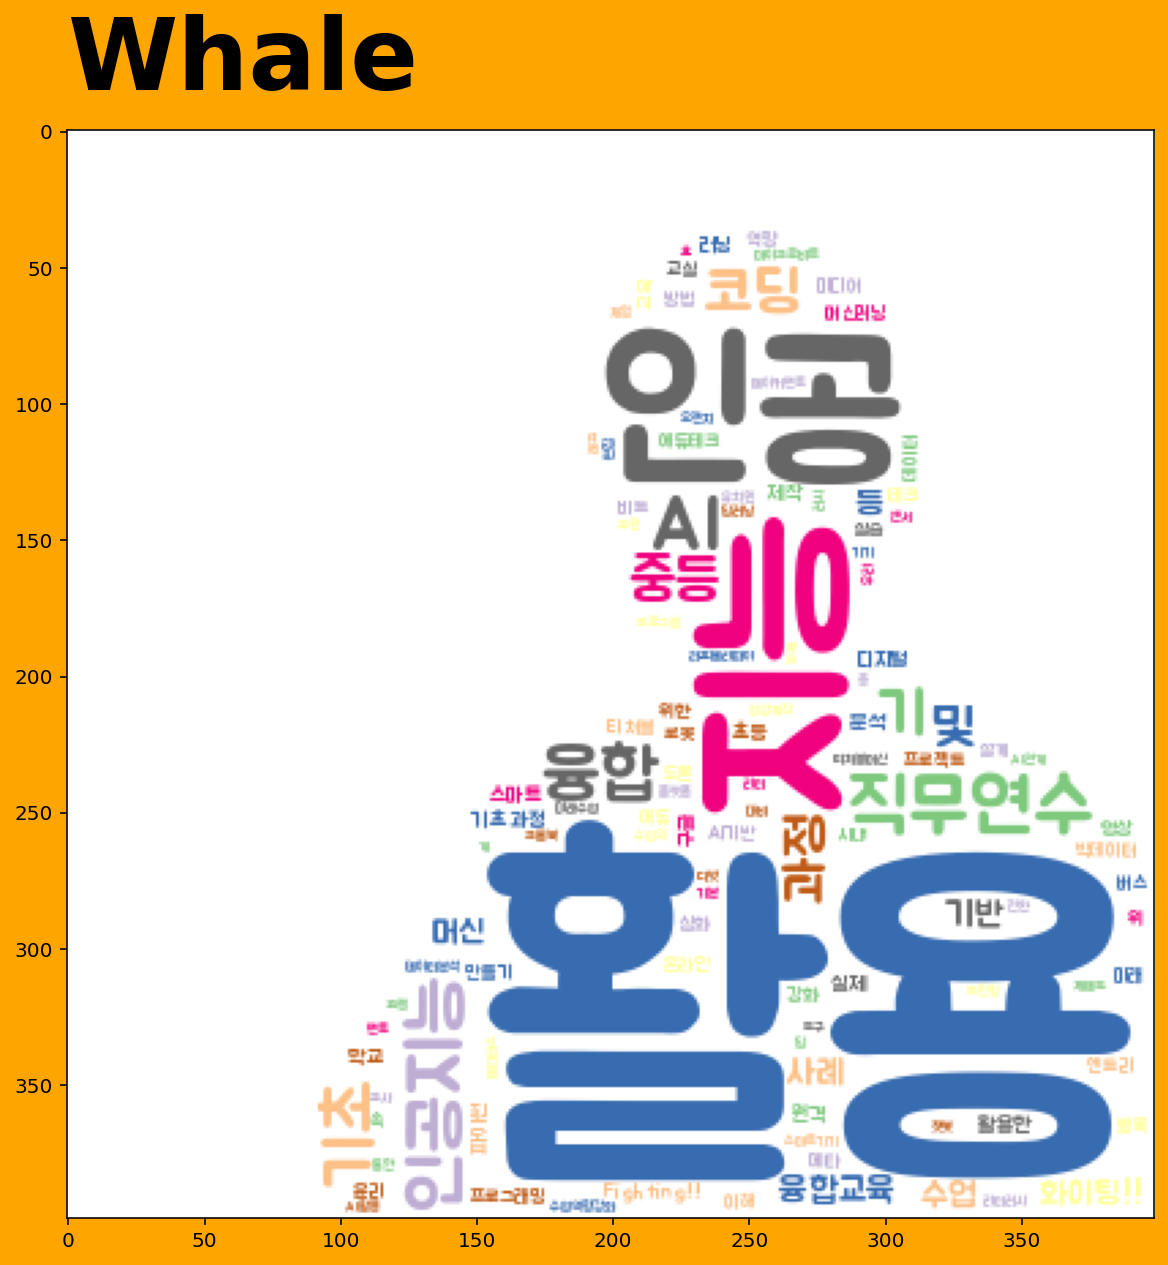

In [ ]:
import random

# 워드 클라우드 만들기
# 폰트 파일을 코랩서버에 업로드 해야 동작합니다.
# 폰트를 수정할 경우 
# 예시) font_path의 작은 따옴표 안에 'BMJUA_ttf.ttf' 대신에 새로운 폰트 이름을 적어주세요. 
# 예시) 새로운 폰트도 코랩서버에 업로드가 되어 있어야 제대로 동작합니다.

# 글씨색, 바탕색, 테두리, 등의 옵션은 아래 링크를 참고하세요. 
# 아래 링크의 하단에 있는 'colormap에서 가능한 색깔모음'을 참고하여 colormap 부분을 수정하면 이미지의 분위기를 조정할 수 있습니다.
# http://blog.naver.com/PostView.nhn?blogId=woosoung1993&logNo=221217222554
wordcloud = WordCloud(max_words=300, max_font_size=150,min_font_size=5,font_path='/content/BMJUA_ttf.ttf',mask=mask, 
                      width=1500, height=500, background_color='white', colormap = "Accent", random_state=30,
                      stopwords=stopwords)

# counter에 있는 명사의 빈도수에 따라 워드클라우드를 생성하기
wordcloud.generate_from_frequencies(counter)

# 차트 생성
# 차트 모양 지정
plt.figure( figsize=(30,10), facecolor='orange')
title_font = {
    'fontsize': 50,
    'fontweight': 'bold'
}
# 차트 제목 지정
plt.title("Whale", fontdict=title_font, loc='left', pad=20)


# matplotlib의 기본 설정으로 보여주기
plt.imshow(wordcloud)

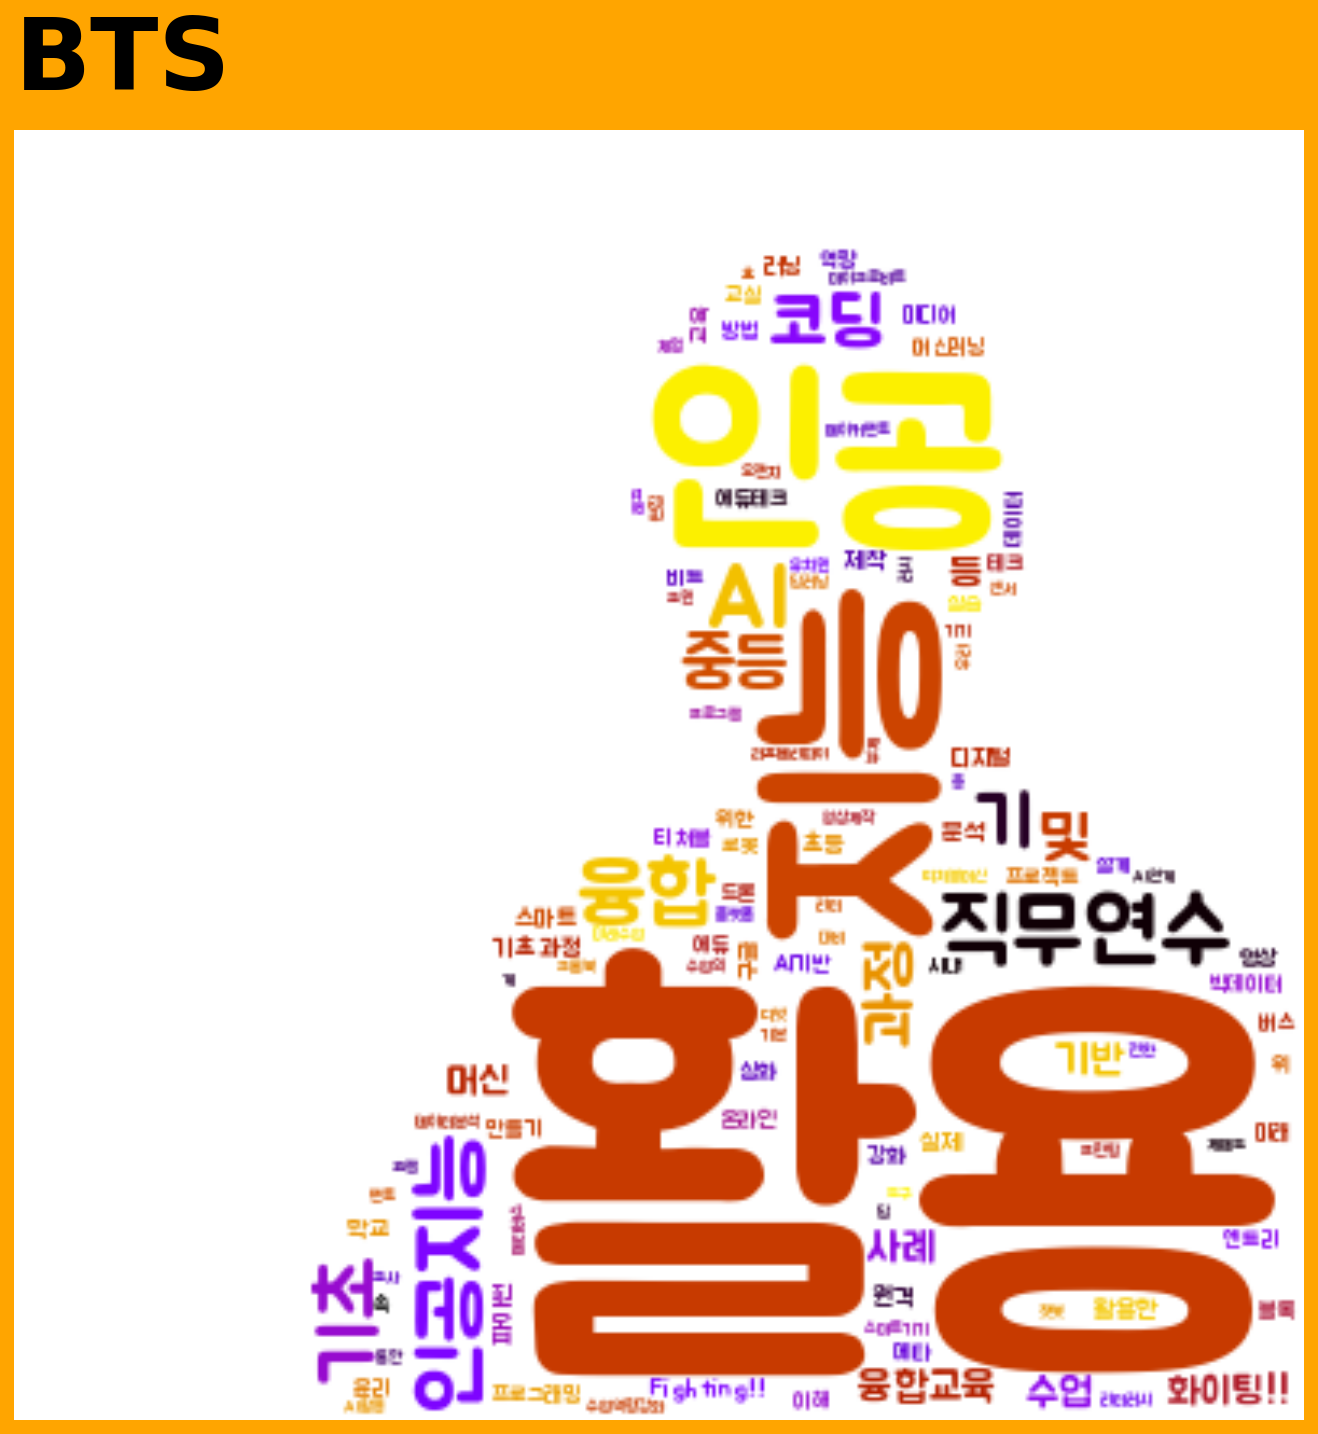

In [ ]:
import random

# 워드 클라우드 만들기
# 폰트 파일을 코랩서버에 업로드 해야 동작합니다.
# 폰트를 수정할 경우 
# 예시) font_path의 작은 따옴표 안에 'BMJUA_ttf.ttf' 대신에 새로운 폰트 이름을 적어주세요. 
# 예시) 새로운 폰트도 코랩서버에 업로드가 되어 있어야 제대로 동작합니다.

# 글씨색, 바탕색, 테두리, 등의 옵션은 아래 링크를 참고하세요. 
# 아래 링크의 하단에 있는 'colormap에서 가능한 색깔모음'을 참고하여 colormap 부분을 수정하면 이미지의 분위기를 조정할 수 있습니다.
# http://blog.naver.com/PostView.nhn?blogId=woosoung1993&logNo=221217222554
wordcloud = WordCloud(max_words=300, max_font_size=150,min_font_size=5,font_path='BMJUA_ttf.ttf',mask=mask, 
                      width=1500, height=500, background_color='white', colormap = "gnuplot", random_state=30,
                      stopwords=stopwords)

# counter에 있는 명사의 빈도수에 따라 워드클라우드를 생성하기
wordcloud.generate_from_frequencies(counter)

# 차트 생성
# 차트 모양 지정
plt.figure( figsize=(30,10), facecolor='orange')
title_font = {
    'fontsize': 50,
    'fontweight': 'bold'
}
# 차트 제목 지정
plt.title("BTS", fontdict=title_font, loc='left', pad=20)

# matplotlib에서 옵션을 조정하여 보여주기
# 이미지를 부드럽게 처리함, 레이아웃을 타이트하게 함, 축을 보여주지 않음 
plt.imshow(wordcloud, interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off') 
plt.show()

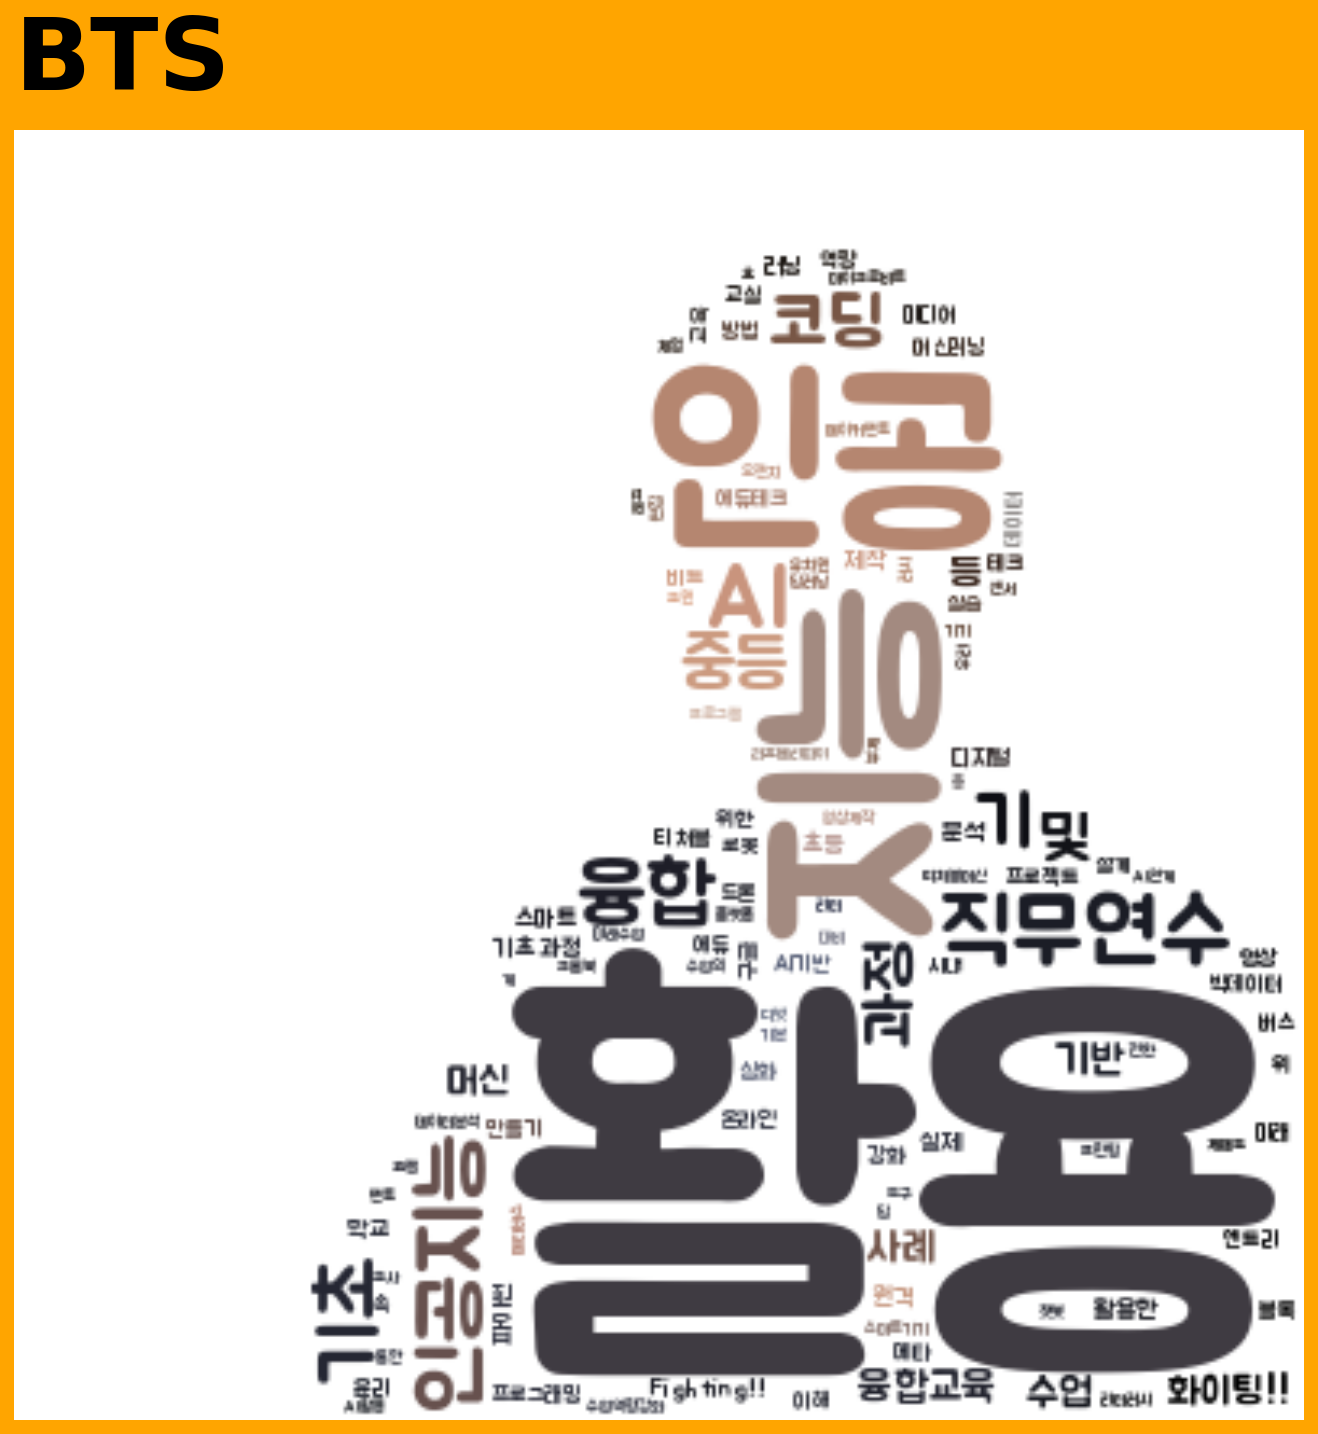

In [ ]:
import random

# 워드 클라우드 만들기
# 폰트 파일을 코랩서버에 업로드 해야 동작합니다.
# 폰트를 수정할 경우 
# 예시) font_path의 작은 따옴표 안에 'BMJUA_ttf.ttf' 대신에 새로운 폰트 이름을 적어주세요. 
# 예시) 새로운 폰트도 코랩서버에 업로드가 되어 있어야 제대로 동작합니다.

# 글씨색, 바탕색, 테두리, 등의 옵션은 아래 링크를 참고하세요.
# http://blog.naver.com/PostView.nhn?blogId=woosoung1993&logNo=221217222554
wordcloud = WordCloud(max_words=300, max_font_size=150,min_font_size=5,font_path='BMJUA_ttf.ttf',mask=mask, 
                      width=1500, height=500, background_color='white', colormap = "brg", random_state=30,
                      stopwords=stopwords)

# counter에 있는 명사의 빈도수에 따라 워드클라우드를 생성하기
wordcloud.generate_from_frequencies(counter)

# 차트 생성
# 차트 모양 지정
plt.figure( figsize=(30,10), facecolor='orange')
title_font = {
    'fontsize': 50,
    'fontweight': 'bold'
}
# 차트 제목 지정
plt.title("BTS", fontdict=title_font, loc='left', pad=20)


# matplotlib에서 옵션을 조정하여 보여주기
# 이미지 컬러 생성기를 이용해 마스크로부터 뽑아낸 이미지의 컬러를 이용해 워드 클라우드의 색을 조정함
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.tight_layout(pad=0)
plt.axis('off') 
plt.show()

# 😃***이미지 저장 방법***
## 1. 위 이미지를 우클릭 한 다음 '이미지를 다른이름으로 저장' 버튼을 눌러 다운로드 함
## 2. Shift+Windows+s 버튼을 눌러 필요한 부분만 캡쳐한 다음 오른쪽 하단에 뜨는 클립보드를 클릭하면 나오는 '캡쳐 및 스케치' 프로그램을 이용해 파일로 저장함

